In [77]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import os
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
print('done !')

done !


In [36]:
import pathlib 

In [37]:
data_dir = './Problem05/train/'

data_dir = pathlib.Path(data_dir)

In [38]:
data_dir

WindowsPath('Problem05/train')

In [39]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


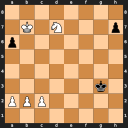

In [40]:
white = list(data_dir.glob('1/*'))
PIL.Image.open(str(white[0]))

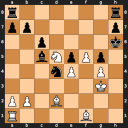

In [41]:
black = list(data_dir.glob('0/*'))
PIL.Image.open(str(black[0]))

In [42]:
batch_size = 32
img_height = 128
img_width = 128

In [43]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18462 files belonging to 2 classes.
Using 14770 files for training.


In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18462 files belonging to 2 classes.
Using 3692 files for validation.


In [45]:
class_names = train_ds.class_names
print(class_names)


['0', '1']


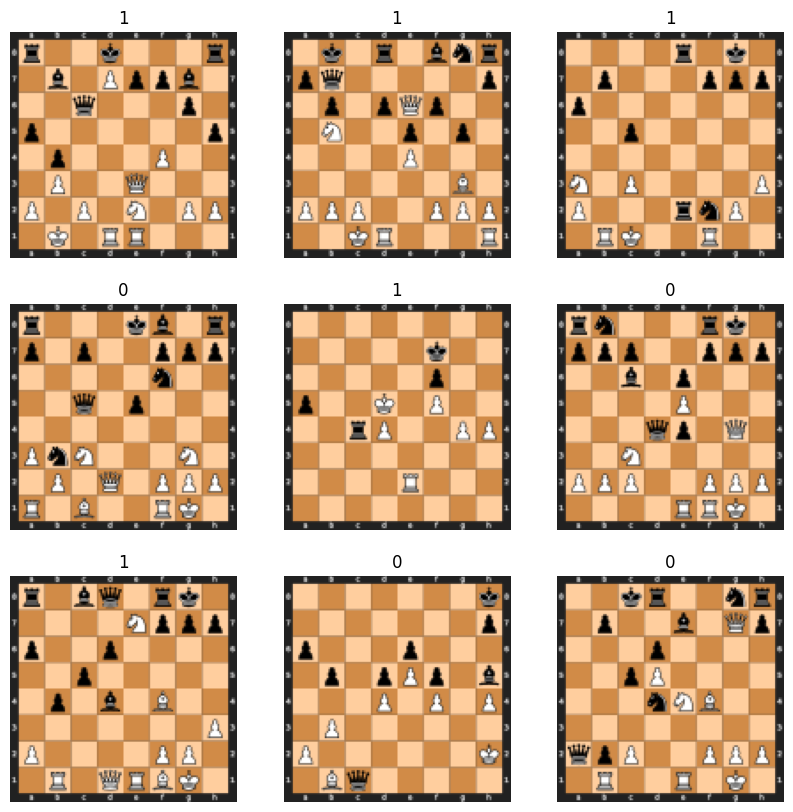

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [47]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [48]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [49]:
normalization_layer = layers.Rescaling(1./255)

In [50]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [51]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [54]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/5
462/462 [==============================] - 70s 150ms/step - loss: 0.6720 - accuracy: 0.5873 - val_loss: 0.6453 - val_accuracy: 0.6222
Epoch 2/5
462/462 [==============================] - 66s 143ms/step - loss: 0.6111 - accuracy: 0.6648 - val_loss: 0.5877 - val_accuracy: 0.6915
Epoch 3/5
462/462 [==============================] - 69s 150ms/step - loss: 0.5857 - accuracy: 0.6916 - val_loss: 0.5871 - val_accuracy: 0.6893
Epoch 4/5
462/462 [==============================] - 69s 149ms/step - loss: 0.5648 - accuracy: 0.7060 - val_loss: 0.5796 - val_accuracy: 0.6882
Epoch 5/5
462/462 [==============================] - 69s 150ms/step - loss: 0.5457 - accuracy: 0.7200 - val_loss: 0.5677 - val_accuracy: 0.6996


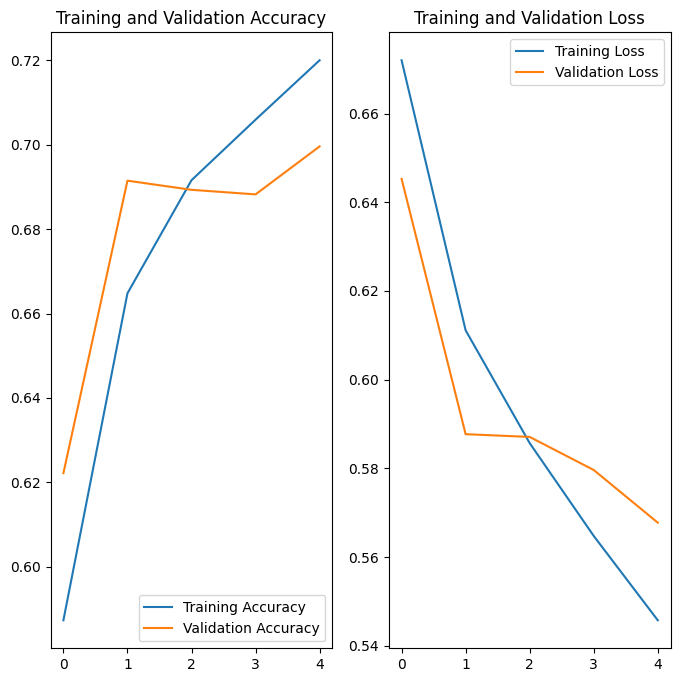

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:

folder_path = './Problem05/test/'
img_width, img_height = 128,128

In [64]:
# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = load_img(img, target_size=(img_width, img_height))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

In [72]:
p_path = './Problem05/test/img2.png'
img = tf.keras.utils.load_img(
    p_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to 0 with a 94.65 percent confidence.


In [73]:
p = []

for i in range(0,4562):
    patht = f'./Problem05/test/img{i}.png'
    img  = tf.keras.utils.load_img(
    patht, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    p.append(class_names[np.argmax(score)])


1/1 [==============================] - 0s 18ms/step


In [76]:
images = []

for z in range(0,4562):
    images.append(f'img{z}')

In [79]:
df = pd.DataFrame({'image' : images , 'label' : p})

In [80]:
df

,image,label
0,img0,1
1,img1,1
2,img2,0
3,img3,1
4,img4,0
...,...,...
4557,img4557,0
4558,img4558,1
4559,img4559,0
4560,img4560,1


In [ ]:
df.to_csv('predictionsn.csv' , index=False)